<a href="https://colab.research.google.com/github/Ohribird/Durk/blob/main/%EB%9E%98%EB%A6%AC%ED%95%98%EC%9D%B4%ED%8A%B8%20%EB%B3%80%EB%8F%99%EC%84%B1%EB%8F%8C%ED%8C%8C%EC%A0%84%EB%9E%B5%20%EB%A7%88%EC%BC%93%ED%83%80%EC%9D%B4%EB%B0%8D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.6184410632646575


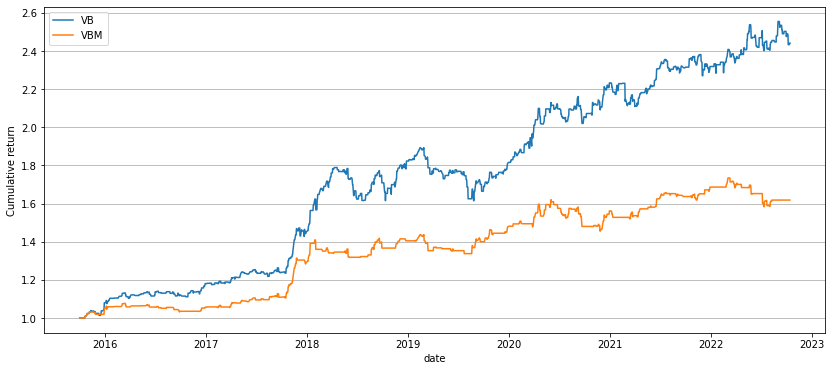

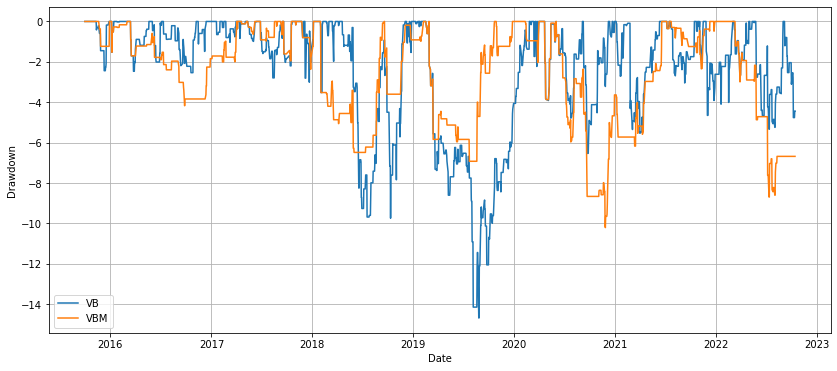

In [13]:
# !pip install finance-datareader 
import FinanceDataReader as fdr
import numpy as np

df = fdr.DataReader('229200','2015')
df['변동'] = df['High']-df['Low']
df['전일변동'] = df['변동'].shift(1)
df['목표가']  = df['Open'] + df['전일변동'] * 0.5
df['수익률'] = np.where(df['High'] >= df['목표가'], df['Close']/df['목표가'],1)
df['누적수익률'] = df['수익률'].cumprod()
delta = df.index[-1] - df.index[0]
year = delta.days / 365
CAGR = df['누적수익률'].iloc[-1] ** (1/year) -1

df['전고점'] = df['누적수익률'].cummax()
df['DD'] = (1- df['누적수익률'] / df['전고점'] )*100

df['DD'].max()

df['MA10'] = df['Close'].rolling(window=10).mean()
df.head(n=10)

# 매매는 거래일의 시가가 전일 종가까지의 데이터로 계산된 10일 이동평균보다
# 높은 경우 실행합니다. 매매신호 컬럼을 다음과 같이 추가합니다.
df['매매신호'] = df['Open'] > df['MA10'].shift(1)

df['수익률2'] = np.where((df['매매신호'] == 1) & (df['High'] >= df['목표가']), 
                        df['Close'] / df['목표가'], 
                        1)

df['누적수익률2'] = df['수익률2'].cumprod()
print(df['누적수익률2'].iloc[-1])


import matplotlib.pyplot as plt

fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(1,1,1)
ax.plot(df['누적수익률'], label = 'VB')
ax.plot(df['누적수익률2'], label = 'VBM')

plt.xlabel('date')
plt.ylabel('Cumulative return')
plt.grid(True, axis = 'y')
plt.legend()  
# plt.show()   -->마켓타이밍 적용하면 더 나빠짐 


df['전고점2'] = df['누적수익률2'].cummax()
df['DD2'] = (1 - df['누적수익률2']/ df['전고점2']) * 100

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1,1,1)

ax.plot(df.index, df['DD']* -1, label = 'VB')
ax.plot(df.index, df['DD2']* -1, label = 'VBM')

ax.grid()
plt.xlabel("Date")
plt.ylabel("Drawdown")
plt.legend(loc="best")
plt.show()
